# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.



### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [10]:
import pandas as pd

In [ ]:
# customer_booking = pd.read_csv(r"C:\Users\jolis\Documents\Cert\British Airways\customer_booking.csv", encoding="ISO-8859-1")
customer_booking = pd.read_csv(r"E:\British Airways_Main\customer_booking.csv", encoding="ISO-8859-1")
# customer_booking = pd.read_csv(r"D:\British Airways_Main\customer_booking.csv", encoding="ISO-8859-1")
customer_booking.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [12]:
customer_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [13]:
# Split route into origin and destination
customer_booking['origin'] = customer_booking['route'].str[:3]
customer_booking['destination'] = customer_booking['route'].str[3:]

# Drop original route column
customer_booking = customer_booking.drop('route', axis=1)

In [14]:
customer_booking["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [15]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}
    
customer_booking["flight_day"] = customer_booking["flight_day"].map(mapping)

In [16]:
customer_booking["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [17]:
customer_booking.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

### Encoding

Encoding refers to the process of transforming categorical data (data that represents categories or groups) into a numerical format that machine learning models can understand and use.

#### One-Hot Encoding

One-Hot Encoding converts categorical data into a binary format, where each category is represented by a new column. A value of 1 indicates the presence of that category, while 0 indicates its absence.

In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
# One-hot encoding categorical variables
categorical_cols = ['sales_channel', 'trip_type']

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the categorical columns
one_hot_encoded = encoder.fit_transform(customer_booking[categorical_cols])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate the one-hot encoded columns with the original DataFrame (drop original categoricals)
customer_booking_encoded = pd.concat([customer_booking.drop(columns=categorical_cols), one_hot_df], axis=1)

In [20]:
customer_booking_encoded.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,origin,destination,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,2,262,19,7,6,New Zealand,1,0,0,5.52,0,AKL,DEL,1.0,0.0,0.0,0.0,1.0
1,1,112,20,3,6,New Zealand,0,0,0,5.52,0,AKL,DEL,1.0,0.0,0.0,0.0,1.0
2,2,243,22,17,3,India,1,1,0,5.52,0,AKL,DEL,1.0,0.0,0.0,0.0,1.0
3,1,96,31,4,6,New Zealand,0,0,1,5.52,0,AKL,DEL,1.0,0.0,0.0,0.0,1.0
4,2,68,22,15,3,India,1,0,1,5.52,0,AKL,DEL,1.0,0.0,0.0,0.0,1.0


In [21]:
customer_booking_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   num_passengers          50000 non-null  int64  
 1   purchase_lead           50000 non-null  int64  
 2   length_of_stay          50000 non-null  int64  
 3   flight_hour             50000 non-null  int64  
 4   flight_day              50000 non-null  int64  
 5   booking_origin          50000 non-null  object 
 6   wants_extra_baggage     50000 non-null  int64  
 7   wants_preferred_seat    50000 non-null  int64  
 8   wants_in_flight_meals   50000 non-null  int64  
 9   flight_duration         50000 non-null  float64
 10  booking_complete        50000 non-null  int64  
 11  origin                  50000 non-null  object 
 12  destination             50000 non-null  object 
 13  sales_channel_Internet  50000 non-null  float64
 14  sales_channel_Mobile    50000 non-null

#### K-Fold Target Encoding

Target Encoding (also known as Mean Encoding) is a technique where each category in a feature is replaced by the mean of the target variable for that category.
K-Fold Target Enconding is an approach to target encoding that is applied to reduce the overfitting that may arise from using target encoding directly on the training data. 
It involves splitting the data into K folds, encoding each fold based on the other folds, and then combining the results.

In [22]:
# Import libraries
from sklearn.model_selection import KFold
import numpy as np

def kfold_target_encoder(df, column, target, k=5):
    """
    Perform k-fold target encoding
    """
    # Initialize KFold
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    
    # Create array to store encoded values
    encoded_values = np.zeros(len(df))
    
    # Perform k-fold target encoding
    for train_idx, val_idx in kf.split(df):
        # Calculate means from training fold
        means = df.iloc[train_idx].groupby(column)[target].mean()
        
        # Map means to validation fold
        encoded_values[val_idx] = df.iloc[val_idx][column].map(means)
    
    # Handle missing values with global mean
    global_mean = df[target].mean()
    encoded_values = np.where(np.isnan(encoded_values), global_mean, encoded_values)
    
    return encoded_values

# Columns to encode
columns_to_encode = ['origin', 'destination', 'booking_origin']

customer_booking_processed = customer_booking_encoded.copy()

# Apply target encoding to each column
for col in columns_to_encode:
    print(f"Encoding column: {col}...")
    customer_booking_processed[f'{col}_encoded'] = kfold_target_encoder(
        customer_booking_processed, 
        col, 
        'booking_complete'
    )
    
# Drop original columns
customer_booking_processed = customer_booking_processed.drop(columns_to_encode, axis=1)

Encoding column: origin...
Encoding column: destination...
Encoding column: booking_origin...


In [23]:
customer_booking_processed.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,origin_encoded,destination_encoded,booking_origin_encoded
0,2,262,19,7,6,1,0,0,5.52,0,1.0,0.0,0.0,0.0,1.0,0.201152,0.113208,0.051643
1,1,112,20,3,6,0,0,0,5.52,0,1.0,0.0,0.0,0.0,1.0,0.201152,0.113208,0.051643
2,2,243,22,17,3,1,1,0,5.52,0,1.0,0.0,0.0,0.0,1.0,0.205818,0.093750,0.108317
3,1,96,31,4,6,0,0,1,5.52,0,1.0,0.0,0.0,0.0,1.0,0.194771,0.061856,0.048951
4,2,68,22,15,3,1,0,1,5.52,0,1.0,0.0,0.0,0.0,1.0,0.204893,0.118812,0.101215


### Predictive Modelling

#### Nessecary Libraries

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.metrics import precision_recall_curve
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#### Random Forest Classifer

A Random Forest Classifier is an ensemble learning method used for classification tasks in machine learning. It operates by combining the predictions of multiple decision trees to produce a more accurate and stable result.

##### Modelling

In [119]:
from sklearn.ensemble import RandomForestClassifier

In [120]:
# Split the data into features and target variable
X = customer_booking_processed.drop('booking_complete', axis=1)

y = customer_booking_processed['booking_complete']

In [121]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(
    n_estimators=100, 
    random_state=42,
    class_weight='balanced'
    )

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classy_report = classification_report(y_test, y_pred)

# Print the accuracy and classification report
print(f"Accuracy: {accuracy:.3f}")
print(f"AUC-ROC Score: {roc_auc_score(y_test, y_pred):.3f}")
print("\nClassification Report:\n", classy_report)

Accuracy: 0.855
AUC-ROC Score: 0.538

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.56      0.09      0.15      1480

    accuracy                           0.85     10000
   macro avg       0.71      0.54      0.54     10000
weighted avg       0.82      0.85      0.81     10000



In [123]:
# Added after using the precision recall graph below to find the optimal threshold
optimal_threshold = 0.24
y_pred_adjusted = (y_pred_proba > optimal_threshold).astype(int)


print("\n" + "="*40)
print("RANDOM FOREST USING OPTIMAL THRESHOLD")
print("="*40)

print(f"\nResults with Optimal threshold ({optimal_threshold}):")
print(f"\nAccuracy: {accuracy_score(y_test, y_pred_adjusted):.3f}")
print(f"AUC-ROC Score: {roc_auc_score(y_test, y_pred_adjusted):.3f}")
print(classification_report(y_test, y_pred_adjusted))


RANDOM FOREST USING OPTIMAL THRESHOLD

Results with Optimal threshold (0.24):

Accuracy: 0.796
AUC-ROC Score: 0.687
              precision    recall  f1-score   support

           0       0.91      0.84      0.88      8520
           1       0.37      0.53      0.44      1480

    accuracy                           0.80     10000
   macro avg       0.64      0.69      0.66     10000
weighted avg       0.83      0.80      0.81     10000



##### Results and Insights

Based on the classification report. Here are some insights:

Overall Accuracy
- The accuracy is 0.85 (85%), which seems good at first glance, but accuracy alone can be misleading, especially if the classes are imbalanced.

Class Distribution
- Support shows class 0 appears 8520 times and class 1 appears 1480 times in your test set.

This indicates a class imbalance where class 0 is much more frequent.

The AUC-ROC score was 0.687. This indicates that the model has a modest ability to distinguish between the positive and negative classes

Precision, Recall, and F1-Score Insights

Class 0
- Precision: 0.91 — Of all the predicted class 0 samples, 91% were correct.

- Recall: 0.84 — The classifier correctly identified 84% of the true class 0 samples.

- F1-score: 0.88 — Good balance between precision and recall for class 0.

This suggests the classifier is very good at detecting class 0.

Class 1
- Precision: 0.37 – Only 37% of the samples predicted as class 1 were actually class 1.

- Recall: 0.53 – The model correctly captured 53% of all true class 1 samples.

- F1-score: 0.44 – This score is significantly lower than for class 0, indicating that the model is struggling to correctly identify class 1.

The model is missing most of the class 1 samples and often misclassifies class 0 as class 1.

Since the dataset was heavily imbalance I decided to use a technique commonly used with imbalanced datasets

##### Precision Recall for Optimal Threshold

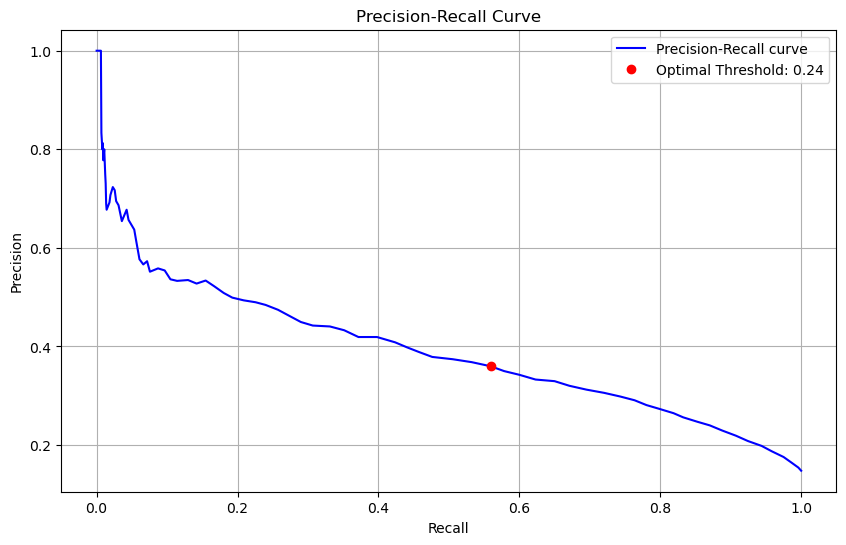

Optimal threshold: 0.240
At optimal threshold - Precision: 0.360, Recall: 0.559


In [68]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get prediction probabilities
y_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, 'b-', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.legend()

# Optional: Find optimal threshold
# (maximizing F1 score)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

# Add optimal point to plot
plt.plot(recall[optimal_idx], precision[optimal_idx], 'ro', 
         label=f'Optimal Threshold: {optimal_threshold:.2f}')
plt.legend()

plt.show()

print(f"Optimal threshold: {optimal_threshold:.3f}")
print(f"At optimal threshold - Precision: {precision[optimal_idx]:.3f}, Recall: {recall[optimal_idx]:.3f}")

#### Random Forest Classifier with SMOTE

SMOTE or Synthetic Minority Over-sampling Technique is a common and effective approach for handling imbalanced datasets in classification problems. It works by generating synthetic samples for the minority class (Class 1 in this instance). This is supposed to increase the representation of the miniority class in the training data. which will in turn allow the model to learn patterns from both classes more effectively.

##### Modelling

In [74]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [125]:
# Prepare your data
X = customer_booking_processed.drop('booking_complete', axis=1)  # Features
y = customer_booking_processed['booking_complete']  # Target

print("Original class distribution:")
print(y.value_counts())
print(f"Class distribution percentages:")
print(y.value_counts(normalize=True) * 100)

Original class distribution:
booking_complete
0    42522
1     7478
Name: count, dtype: int64
Class distribution percentages:
booking_complete
0    85.044
1    14.956
Name: proportion, dtype: float64


In [132]:
# Split data BEFORE applying SMOTE (important!)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.20,  # 20% for testing 
    random_state=42, 
    stratify=y  # Maintain class distribution in splits
)

print(f"\nTraining set class distribution:")
print(y_train.value_counts())

# Apply SMOTE only to training data
smote = SMOTE(
    random_state=42,
    k_neighbors=5,  # Number of nearest neighbors to use
    sampling_strategy= 'auto'  # 'auto' balances to 50:50, or use float for custom ratio
)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"\nAfter SMOTE - Training set class distribution:")
print(pd.Series(y_train_resampled).value_counts())

print(f"New class distribution percentages:")
print(pd.Series(y_train_resampled).value_counts(normalize=True) * 100)

# Calculate the changes
original_size = len(y_train)
new_size = len(y_train_resampled)
size_change = ((new_size - original_size) / original_size) * 100

print(f"\nDataset size change: {size_change:+.1f}%")


Training set class distribution:
booking_complete
0    34018
1     5982
Name: count, dtype: int64

After SMOTE - Training set class distribution:
booking_complete
0    34018
1    34018
Name: count, dtype: int64
New class distribution percentages:
booking_complete
0    50.0
1    50.0
Name: proportion, dtype: float64

Dataset size change: +70.1%


In [133]:
# Train Random Forest on balanced data
rf_smote = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced',
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2
)

# Fit on the resampled training data
rf_smote.fit(X_train_resampled, y_train_resampled)

# Make predictions on original test set (not resampled!)
y_pred = rf_smote.predict(X_test)
y_pred_proba = rf_smote.predict_proba(X_test)[:, 1]


In [134]:
# Step 6: Evaluate performance
print("\n" + "="*50)
print("RANDOM FOREST WITH SMOTE RESULTS")
print("="*50)

print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"AUC-ROC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred))


RANDOM FOREST WITH SMOTE RESULTS

Accuracy: 0.7506
AUC-ROC Score: 0.7519

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.79      0.84      8504
           1       0.31      0.55      0.40      1496

    accuracy                           0.75     10000
   macro avg       0.61      0.67      0.62     10000
weighted avg       0.82      0.75      0.78     10000



In [136]:
# Added after using the graph below to find the optimal threshold
opltimal_threshold = 0.45
y_pred_adjusted = (y_pred_proba > opltimal_threshold).astype(int)

print("\n" + "="*60)
print("RANDOM FOREST WITH SMOTE RESULTS AND USING OPTIMAL THRESHOLD")
print("="*60)

print(f"\nResults with Optimal threshold ({opltimal_threshold}):")
print(f"\nAccuracy: {accuracy_score(y_test, y_pred_adjusted):.4f}")
print(f"AUC-ROC Score: {roc_auc_score(y_test, y_pred_adjusted):.4f}")
print(classification_report(y_test, y_pred_adjusted))


RANDOM FOREST WITH SMOTE RESULTS AND USING OPTIMAL THRESHOLD

Results with Optimal threshold (0.45):

Accuracy: 0.7301
AUC-ROC Score: 0.6964
              precision    recall  f1-score   support

           0       0.92      0.74      0.82      8504
           1       0.31      0.65      0.42      1496

    accuracy                           0.73     10000
   macro avg       0.62      0.70      0.62     10000
weighted avg       0.83      0.73      0.76     10000



##### Results

Without the SMOTE technique the Class distribution 85% to 15% in favor of Class 0 (booking not completed).

But with the SMOTE technique the Class distribution is now 50% each


Both Result using the SMOTE Techinque drastically increase the model's behaivour in my opinion using the optimal threshold was better overall. There are some notable tradeoffs some i expexcted others not so much.
- Accuracy dropped  79.6% to 72.3%
- Recall for Class 1 (one of the main focus) increase from 53% to 65%
- Precision for Class 1 decreased from 37% to 31% which apparently is an expected tradeoff for recall
- F1 Score for Class 1 increased
- Recall for Class 0 decreased from 84% to 73%, meaning more false positives were introduced
- The AUC-ROC score increased slightly to 0.7009. This improvement suggests that balancing the dataset with synthetic minority samples helped the classifier become better at ranking positive cases higher than negative ones


While the results were better i still feel like the model could perform better. I decided to try a SMOTE variation called SMOTE-ENN

##### Feature Importance Analysis, Precision Recall for Optimal Threshold and Confusion Matrix

In [129]:
# Feature importance analysis
print("\n" + "="*50)
print("FEATURE IMPORTANCE (SMOTE Model)")
print("="*50)

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_smote.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features:")
print(feature_importance.head(10))


FEATURE IMPORTANCE (SMOTE Model)
Top 10 Most Important Features:
                   feature  importance
16  booking_origin_encoded    0.419407
14          origin_encoded    0.150761
15     destination_encoded    0.140869
8          flight_duration    0.102151
9   sales_channel_Internet    0.048319
10    sales_channel_Mobile    0.046902
2           length_of_stay    0.026781
4               flight_day    0.017093
1            purchase_lead    0.015715
0           num_passengers    0.009381


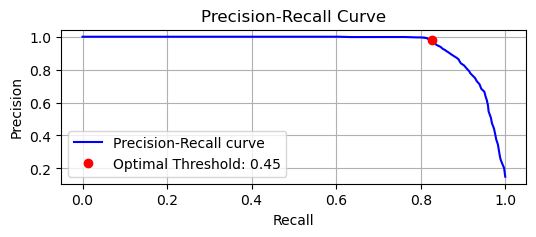

Optimal threshold: 0.450
At optimal threshold - Precision: 0.979, Recall: 0.827


In [135]:

# Get prediction probabilities
y_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Create the plot
plt.figure(figsize=(6, 2))
plt.plot(recall, precision, 'b-', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.legend()

# Optional: Find optimal threshold
# (maximizing F1 score)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

# Add optimal point to plot
plt.plot(recall[optimal_idx], precision[optimal_idx], 'ro', 
         label=f'Optimal Threshold: {optimal_threshold:.2f}')
plt.legend()

plt.show()

print(f"Optimal threshold: {optimal_threshold:.3f}")
print(f"At optimal threshold - Precision: {precision[optimal_idx]:.3f}, Recall: {recall[optimal_idx]:.3f}")

#### Random Forest Classifier With SMOTE-ENN

SMOTE-ENN is a hybrid resampling technique that combines SMOTE (Synthetic Minority Oversampling Technique) and ENN (Edited Nearest Neighbors) to address imbalanced datasets in machine learning. While SMOTE oversamples the minority class to increase its representation ENN cleans the oversampled dataset by removing noisy or misclassified samples, improving data quality.

##### Modelling

In [137]:
# Import necessary libraries
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.ensemble import RandomForestClassifier
from collections import Counter

In [138]:
# Prepare your data
# Assuming your dataset is customer_booking_processed after target encoding
X = customer_booking_processed.drop('booking_complete', axis=1)  # Features
y = customer_booking_processed['booking_complete']  # Target

print("Original class distribution:")
print(y.value_counts())
print(f"Class distribution percentages:")
print(y.value_counts(normalize=True) * 100)
print(f"Original dataset size: {len(y)}")

# Split data BEFORE applying SMOTE-ENN (important!)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  # Maintain class distribution in splits

print(f"\nTraining set class distribution:")
print(y_train.value_counts())
print(f"Training set size: {len(y_train)}")

Original class distribution:
booking_complete
0    42522
1     7478
Name: count, dtype: int64
Class distribution percentages:
booking_complete
0    85.044
1    14.956
Name: proportion, dtype: float64
Original dataset size: 50000

Training set class distribution:
booking_complete
0    34018
1     5982
Name: count, dtype: int64
Training set size: 40000


In [139]:
# Apply SMOTE-ENN to training data
print("\n" + "="*60)
print("APPLYING SMOTE-ENN")
print("="*60)

# Initialize SMOTE-ENN with custom parameters
smote_enn = SMOTEENN(
    smote=SMOTE(
        random_state=42,
        k_neighbors=5,
        sampling_strategy='auto'  # Can also use float like 0.8
    ),
    enn=EditedNearestNeighbours(
        n_neighbors=3,  # Number of neighbors for ENN
        kind_sel='all'  # 'all' removes samples that disagree with all neighbors
    ),
    random_state=42
)

print("Applying SMOTE-ENN resampling...")
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

print(f"\nAfter SMOTE-ENN - Training set class distribution:")
print(pd.Series(y_train_resampled).value_counts())
print(f"New class distribution percentages:")
print(pd.Series(y_train_resampled).value_counts(normalize=True) * 100)
print(f"Resampled training set size: {len(y_train_resampled)}")

# Calculate the changes
original_size = len(y_train)
new_size = len(y_train_resampled)
size_change = ((new_size - original_size) / original_size) * 100

print(f"\nDataset size change: {size_change:+.1f}%")
print(f"Samples removed by ENN: {original_size - new_size + (pd.Series(y_train_resampled).value_counts()[1] - y_train.value_counts()[1])}")



APPLYING SMOTE-ENN
Applying SMOTE-ENN resampling...

After SMOTE-ENN - Training set class distribution:
booking_complete
0    34018
1    30796
Name: count, dtype: int64
New class distribution percentages:
booking_complete
0    52.485574
1    47.514426
Name: proportion, dtype: float64
Resampled training set size: 64814

Dataset size change: +62.0%
Samples removed by ENN: 0


In [140]:
# Train Random Forest on SMOTE-ENN balanced data
print("\n" + "="*40)
print("TRAINING RANDOM FOREST WITH SMOTE-ENN")
print("="*40)

rf_smote_enn = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight=None  # No need for class_weight with balanced data
)

# Fit on the SMOTE-ENN resampled training data
rf_smote_enn.fit(X_train_resampled, y_train_resampled)

# Make predictions on original test set
y_pred = rf_smote_enn.predict(X_test)
y_pred_proba = rf_smote_enn.predict_proba(X_test)[:, 1]


# Evaluate performance
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"AUC-ROC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred))


TRAINING RANDOM FOREST WITH SMOTE-ENN

Accuracy: 0.7584
AUC-ROC Score: 0.7489

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85      8504
           1       0.30      0.48      0.37      1496

    accuracy                           0.76     10000
   macro avg       0.60      0.64      0.61     10000
weighted avg       0.81      0.76      0.78     10000



##### Results

Across the board other an improvement in AUC. it seems like SMOTE-ENN all other metrics fell slightly compared to the original model. 

This indicates SMOTE-ENN changed the decision boundary in a way hurts the practical thresholded detection of positives in your current setup but maybe helps the global ranking.

With all this in mind i decided to try two other models to observe if there is a significant improvement

##### Feature Analysis

In [141]:
# Step 9: Feature importance analysis
print("\n" + "="*60)
print("FEATURE IMPORTANCE (SMOTE-ENN Model)")
print("="*60)

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_smote_enn.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features:")
print(feature_importance.head(10))


FEATURE IMPORTANCE (SMOTE-ENN Model)
Top 10 Most Important Features:
                   feature  importance
16  booking_origin_encoded    0.414917
14          origin_encoded    0.140481
15     destination_encoded    0.138550
8          flight_duration    0.107206
10    sales_channel_Mobile    0.051694
9   sales_channel_Internet    0.047882
2           length_of_stay    0.032720
4               flight_day    0.017915
1            purchase_lead    0.016063
0           num_passengers    0.010419


#### LightGBM

LightGBM is a gradient boosting framework. It builds trees sequentially, where each new tree aims to correct the errors made by the previous trees. It often achieves higher accuracy than Random Forest, especially with proper hyperparameter tuning, by focusing on reducing errors iteratively.

##### Modelling

In [145]:
# Import required libraries
import lightgbm as lgb
from lightgbm import early_stopping
from lightgbm import log_evaluation
import warnings
warnings.filterwarnings('ignore')

In [146]:
# Split data
X = customer_booking_processed.drop('booking_complete', axis=1)
y = customer_booking_processed['booking_complete']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

# Create LightGBM datasets
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Set parameters
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'is_unbalance': True,
    'verbose': -1
}

# Train model
model = lgb.train(params,
                  train_data,
                  num_boost_round=100,
                  valid_sets=[train_data, test_data],
                  callbacks=[
                      early_stopping(stopping_rounds=10),
                      log_evaluation(period=20)
                    ])

# Make predictions
# Optimal threshold 0.256 was found after using the precision recall graph below
y_pred = (model.predict(X_test) > 0.256).astype(int)

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[5]	training's binary_logloss: 0.399761	valid_1's binary_logloss: 0.400724


In [147]:
# Print results
print("\n" + "="*50)
print("LIGHTGBM MODEL RESULTS WITH OPTIMAL THRESHOLD")
print("="*50)

print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"AUC-ROC Score: {roc_auc_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


LIGHTGBM MODEL RESULTS WITH OPTIMAL THRESHOLD

Accuracy: 0.7375
AUC-ROC Score: 0.7187

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.75      0.83      8504
           1       0.32      0.69      0.44      1496

    accuracy                           0.74     10000
   macro avg       0.63      0.72      0.63     10000
weighted avg       0.84      0.74      0.77     10000



##### Results and Insights

This model behave pretty similar to the SMOTE model which a slight increase in most areas
- Accuracy increased from 72.3% to 73.8% 
- AUC-ROC increased 0.7187 vs 0.7009 the model is slightly better at identifying positive cases
- Recall for Class 1 increase to 69% from 65%
- Precision for Class 1 increased to 32% from 31% this means the model has slightly fewer false positives among predicted positives.
- F1 score increase to 0.44 from 0.42
- Even the recall of class 0 increased to 75% from 73%

While the increase are modest at best. They are consistent across most metrics

##### Feature Importance Analysis and Precision Recall Graph for Optimal Threshold


Top 10 Most Important Features:
                   feature  importance
14          origin_encoded          36
16  booking_origin_encoded          31
2           length_of_stay          21
9   sales_channel_Internet          12
1            purchase_lead          12
6     wants_preferred_seat          10
8          flight_duration          10
5      wants_extra_baggage           9
15     destination_encoded           6
7    wants_in_flight_meals           3


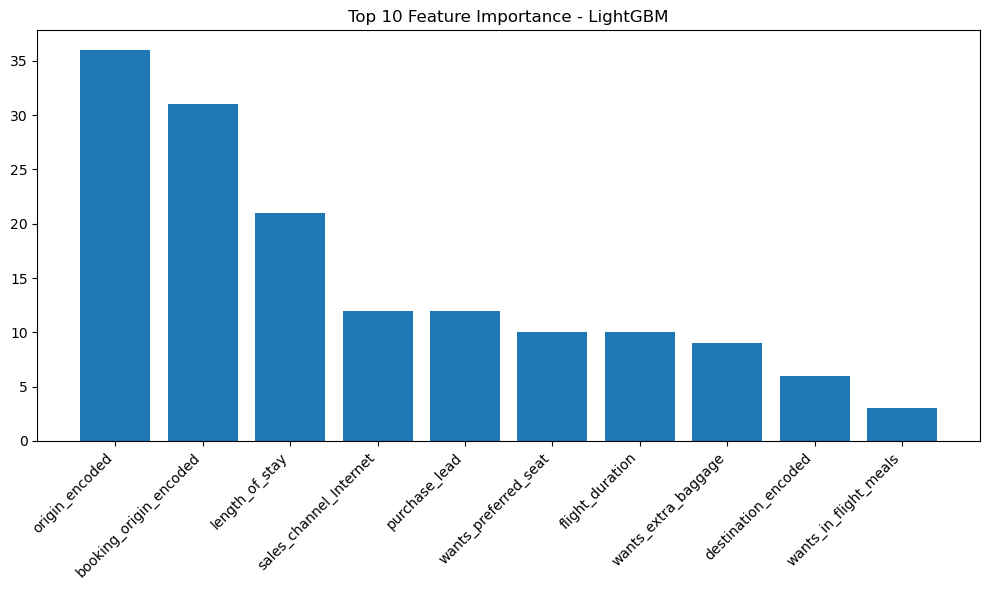

In [148]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importance()
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'][:10], feature_importance['importance'][:10])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Feature Importance - LightGBM')
plt.tight_layout()
plt.show()

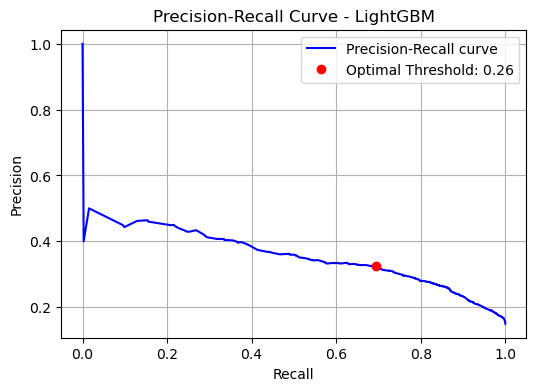


Optimal threshold: 0.256
At optimal threshold - Precision: 0.324, Recall: 0.695


In [150]:
# Get prediction probabilities for precision-recall curve
y_pred_proba = model.predict(X_test)

# Calculate and plot precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, 'b-', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - LightGBM')
plt.grid(True)
plt.legend()

# Find optimal threshold
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

plt.plot(recall[optimal_idx], precision[optimal_idx], 'ro', 
         label=f'Optimal Threshold: {optimal_threshold:.2f}')
plt.legend()
plt.show()

print(f"\nOptimal threshold: {optimal_threshold:.3f}")
print(f"At optimal threshold - Precision: {precision[optimal_idx]:.3f}, Recall: {recall[optimal_idx]:.3f}")

#### XGBoost

This is a highly optimized gradient boosting framework that sequentially builds decision trees, where each new tree corrects the errors of the previous ones. It uses a more regularized model formalization to prevent overfitting and supports parallel processing.

##### Modelling

In [25]:
# Import required libraries
import xgboost as xgb

In [26]:
# Prepare data
X = customer_booking_processed.drop('booking_complete', axis=1)
y = customer_booking_processed['booking_complete']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 6,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'min_child_weight': 1,
    'scale_pos_weight': len(y_train[y_train==0]) / len(y_train[y_train==1])  # Handle imbalance
}

# Train model
model = xgb.train(
    params,
    dtrain,
    num_boost_round=100,
    evals=[(dtrain, 'train'), (dtest, 'test')],
    early_stopping_rounds=10,
    verbose_eval=20
)

# Make predictions
y_pred_proba = model.predict(dtest)
y_pred = (y_pred_proba > 0.5).astype(int)

[0]	train-logloss:0.66990	test-logloss:0.67030
[20]	train-logloss:0.54472	test-logloss:0.55608
[40]	train-logloss:0.52224	test-logloss:0.54204
[60]	train-logloss:0.50795	test-logloss:0.53528
[80]	train-logloss:0.49480	test-logloss:0.52911
[99]	train-logloss:0.48438	test-logloss:0.52440


In [27]:
# Print results
print("\n" + "="*50)
print("XGBOOST MODEL RESULTS")
print("="*50)

print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"AUC-ROC Score: {roc_auc_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


XGBOOST MODEL RESULTS

Accuracy: 0.7140
AUC-ROC Score: 0.7302

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.71      0.81      8504
           1       0.31      0.75      0.44      1496

    accuracy                           0.71     10000
   macro avg       0.63      0.73      0.62     10000
weighted avg       0.85      0.71      0.75     10000



##### Feature Importance Analysis and Precision Recall Graph for Optimal Threshold


Top 10 Most Important Features:
                   feature  importance
1            purchase_lead       688.0
14          origin_encoded       678.0
15     destination_encoded       670.0
2           length_of_stay       601.0
16  booking_origin_encoded       551.0
3              flight_hour       473.0
8          flight_duration       296.0
4               flight_day       239.0
0           num_passengers       182.0
5      wants_extra_baggage       107.0


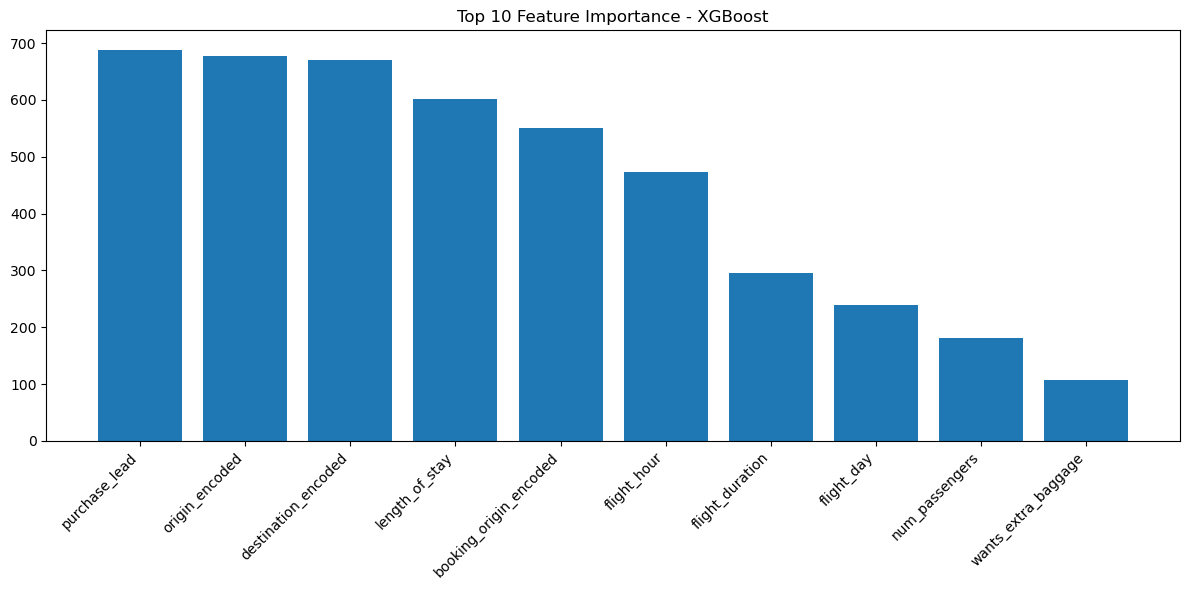

In [ ]:
# Get feature importance
importance_scores = model.get_score(importance_type='weight')
importance_df = pd.DataFrame({
    'feature': list(importance_scores.keys()),
    'importance': list(importance_scores.values())
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(importance_df.head(10))

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.bar(importance_df['feature'][:10], importance_df['importance'][:10])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Feature Importance - XGBoost')
plt.tight_layout()
plt.show()

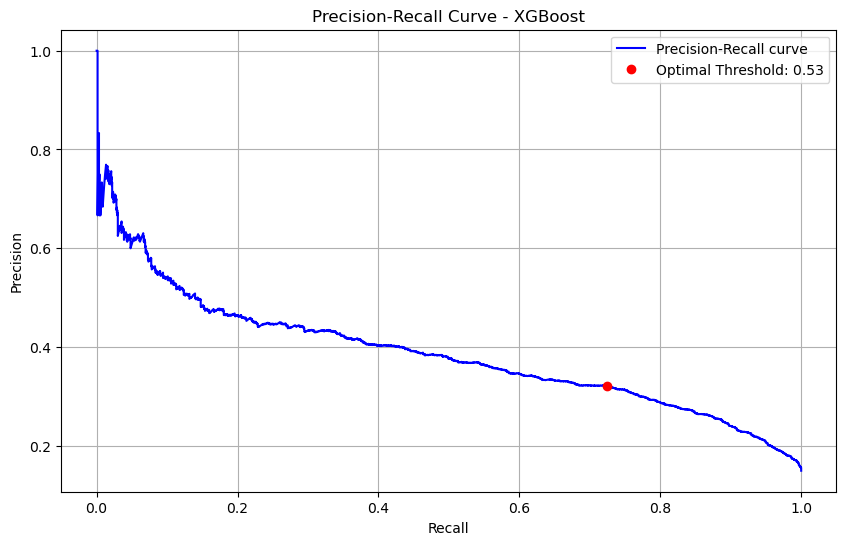


Results with Optimal threshold (0.528):

Adjusted Accuracy: 0.7298
AUC-ROC Score: 0.7274

Adjusted Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.73      0.82      8504
           1       0.32      0.72      0.44      1496

    accuracy                           0.73     10000
   macro avg       0.63      0.73      0.63     10000
weighted avg       0.85      0.73      0.77     10000



In [ ]:
# Plot precision-recall curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, 'b-', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - XGBoost')
plt.grid(True)

# Find optimal threshold
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_idx = np.argmax(f1_scores[~np.isnan(f1_scores)])
optimal_threshold = thresholds[optimal_idx]

# Add optimal point to plot
plt.plot(recall[optimal_idx], precision[optimal_idx], 'ro', 
         label=f'Optimal Threshold: {optimal_threshold:.2f}')
plt.legend()
plt.show()

# Print results with optimal threshold
y_pred_adjusted = (y_pred_proba > optimal_threshold).astype(int)
print(f"\nResults with Optimal threshold ({optimal_threshold:.3f}):")
print(f"\nAdjusted Accuracy: {accuracy_score(y_test, y_pred_adjusted):.4f}")
print(f"AUC-ROC Score: {roc_auc_score(y_test, y_pred_adjusted):.4f}")
print("\nAdjusted Classification Report:")
print(classification_report(y_test, y_pred_adjusted))

##### Insights and Results

Compare this model with the LightGBM. This model finds more postive but as a cost of overall accuracy 

- Accuracy: 73.75% (LightGBM) vs 72.98% (XGBoost) → LightGBM +0.77 pp.

- AUC-ROC: 0.7187 (LightGBM) vs 0.7274 (XGBoost) XGBoost slightly better

- Recall for Class 1: 69% (LightGBM) vs 72% (XGBoost) → XGBoost finds more positives

- Precision and F1 score for Class 1 remained the same

- Recall for Class 0: 75% (LightGBM) vs 73% (XGBoost) → LightGBM +2 pp (majority class better identified).

- Precision for Class 0: 93% (LightGBM) vs 94% (XGBoost) → Slight increase

### Summary
The XGBoost model presents a viable solution with strong recall for the critical minority class, balanced precision for the majority class, and overall reasonable accuracy. While the model addresses class imbalance well with parameter tuning and threshold optimization, precision improvements for the minority class and further robustness require additional data, model enhancements, and continual evaluation.


In summary the Models result was;

Overall Model Accuracy: 73%

AUC-ROC Score of the Model (The ability of a model to distinguish between positive and negative classes): 73%

**Prediction Score (Classification Report):** 

- Precison: Measures the accuracy of positive predictions (Of all the instances predicted as positive, how many were actually positive)
- Recall: Measures the model's ability to find all positive instances (Of all the actual positive instances, how many were correctly predicted as positive?)
- F1 Score: Simply the Harmonic Average of Precision and Recall
- Support: Indicates the number of actual occurrences of each class in the datase


For Class 0 (Not booked)
- Precision 94%
- Recall 73% 
- F1 Score: 82%
- Support 8504

For Class 1 (Booked) (Our Main Aim)
- Precision 34%
- Recall 72%
- F1 score 44%
- Support 1496

### Recommendations and Future Work

- Further Model and Parameter Tuning

- Continue hyperparameter optimization via grid search or Bayesian methods on parameters such as max_depth, eta, min_child_weight, and subsampling ratios.

- Advanced Feature Engineering

**More Data Collection**

Acquire additional data targeting the minority class (class 1) to reduce imbalance and better generalize the model’s learning.

More balanced data can lead to improved precision and stability.

Threshold and Calibration Techniques

Regularly revisit optimal threshold tuning as new data arrives.

**Error Analysis and Monitoring**

Analyze cases where the model misclassifies minority class to identify weak spots.

Set up monitoring pipelines to track model drift and performance over time in production.

### Future Work

##### Hyperparameter Tuning Using Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [ ]:
# Your existing data preparation
X = customer_booking_processed.drop('booking_complete', axis=1) 
y = customer_booking_processed['booking_complete'] 

# Split data 
X_train, X_test, y_train, y_test = train_test_split( 
    X, y,  
    test_size=0.2, 
    random_state=42, 
    stratify=y 
) 

# Method 1: Using XGBClassifier with GridSearchCV (Recommended)
print("Starting Grid Search with XGBClassifier...")

# Initialize XGBClassifier
xgb_classifier = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1])  # Handle imbalance
)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'min_child_weight': [1, 3, 5]
}

# Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid,
    scoring='roc_auc',  # or 'accuracy', 'f1', etc.
    cv=cv,
    n_jobs=-1,  # Use all available cores
    verbose=1,  # Show progress
    return_train_score=True
)

# Fit grid search
print("Fitting Grid Search (this may take a while)...")
grid_search.fit(X_train, y_train)

# Get best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

print(f"\nBest Parameters: {best_params}")
print(f"Best Cross-Validation Score (ROC-AUC): {best_score:.4f}")

# Make predictions with best model
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]
y_pred_best = best_model.predict(X_test)

Starting Grid Search with XGBClassifier...
Fitting Grid Search (this may take a while)...
Fitting 5 folds for each of 972 candidates, totalling 4860 fits

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 8, 'min_child_weight': 5, 'n_estimators': 200, 'subsample': 0.8}
Best Cross-Validation Score (ROC-AUC): 0.7919


In [ ]:
# Evaluate best model
print(f"\nBest Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"AUC-ROC Score: {roc_auc_score(y_test, y_pred_proba_best):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))


Best Model Performance:
Accuracy: 0.7151
AUC-ROC Score: 0.7961

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.71      0.81      8504
           1       0.31      0.74      0.44      1496

    accuracy                           0.72     10000
   macro avg       0.63      0.73      0.62     10000
weighted avg       0.85      0.72      0.75     10000

